**Data cleaning and exploring question 3**

Our third question is:

If client wants to buy a big house in the north of the city, what grade of house can they expect to get?

In [1]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

import seaborn as sns

df = pd.read_csv("kc_house_data.csv")

**Price**

In [2]:
def remove_outlier(df_in, col_name):
   q1 = df_in[col_name].quantile(0.25)
   q3 = df_in[col_name].quantile(0.75)
   iqr = q3-q1 #this calculates the interquartile range
   fence_low  = q1 - (1.5*iqr) #this removes the outliers at the lower range of the dataset for price
   fence_high = q3 + (1.5*iqr) #this removes the outliers at the higher range of the dataset for price
   df_out = df_in.loc[(df_in[col_name] >= fence_low) & (df_in[col_name] <= fence_high)]
   return df_out

In [3]:
df2 = remove_outlier(df,'price')

In [4]:
df2.shape

(20439, 21)

**Sqft_living**

In [5]:
df3 = remove_outlier(df2,'sqft_living')

In [6]:
df3.shape

(20120, 21)

**Grade**

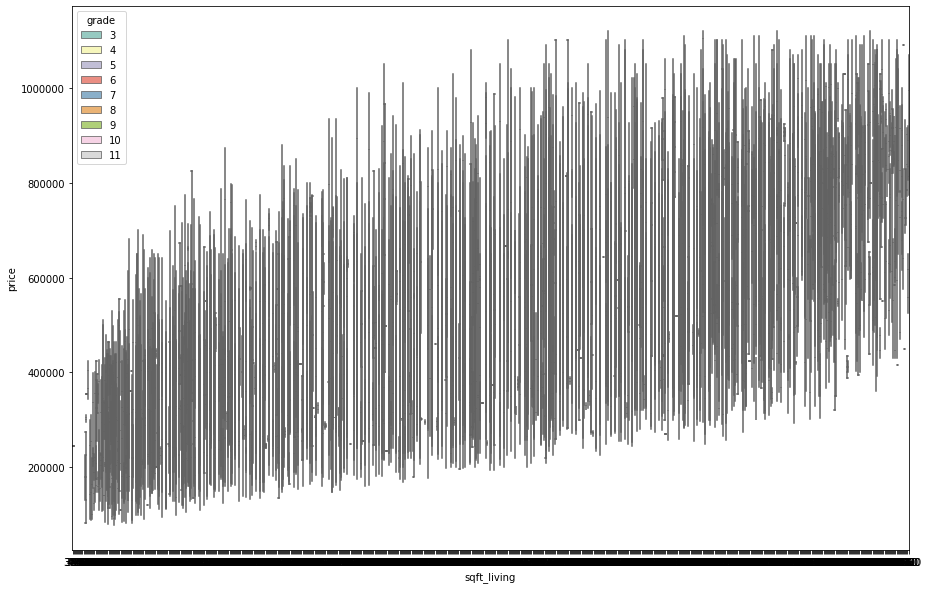

In [9]:
plt.figure(figsize = (15,10))
ax = sns.boxplot(x="sqft_living", y="price", hue="grade",
                data=df3, palette="Set3", showfliers = False)

**Floors**

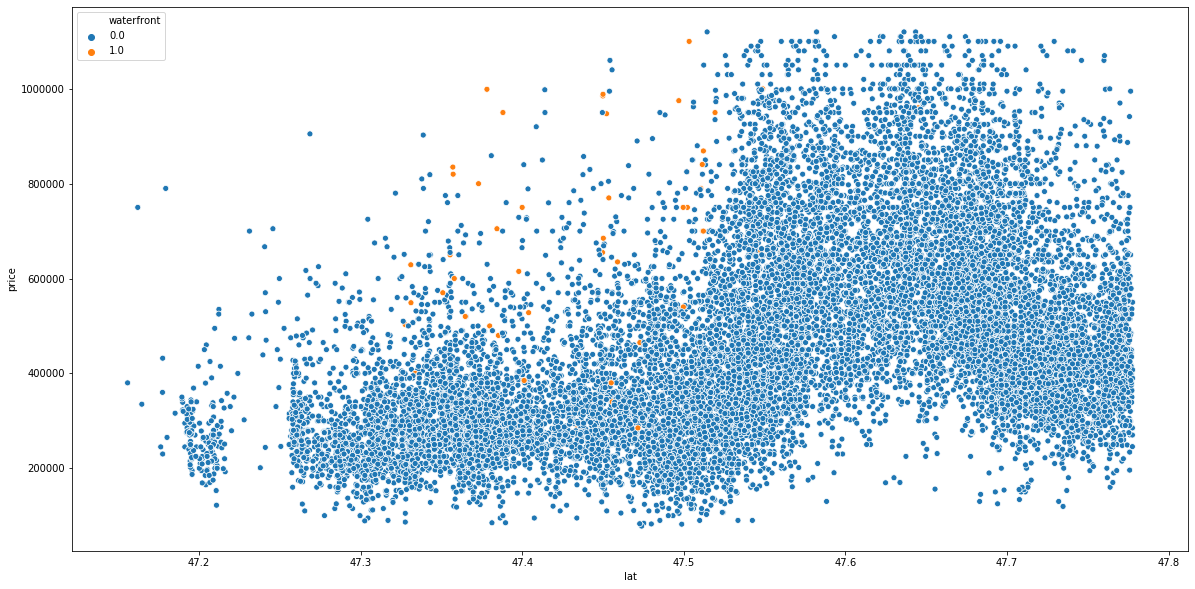

In [7]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="lat", y="price", hue="waterfront",
                      data=df3)

In [ ]:
df.plot.scatter(x='sqft_living', y='price', c='bathrooms', s=50, colormap='viridis');

In [ ]:
df.plot.scatter(x='sqft_living', y='price', c='view', s=50, colormap='viridis');

In [ ]:
df.plot.scatter(x='sqft_living', y='price', c='sqft_living15', s=50, colormap='viridis');

In [ ]:
df['yr_built'].unique()

In [ ]:
df['sales_year'] = df.date.map(lambda x: '{}'.format(x[-4:]))

In [ ]:
df_with_sales_year = df

In [ ]:
df['yr_built'].dtype

In [ ]:
df['sales_year'].dtype

In [ ]:
df_with_sales_year['sales_year'] = df_with_sales_year['sales_year'].astype(int)

In [ ]:
df_with_sales_year.head()

In [ ]:
df_with_sales_year['age_house'] = df_with_sales_year['sales_year'] - df_with_sales_year['yr_built']

df_with_sales_year.head()

In [ ]:
df.loc[df['yr_renovated'] == 0.0, "renovated"]= '0'

In [ ]:
df.loc[df['yr_renovated'] != 0.0, "renovated"]= '1'

In [ ]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="sqft_living", y="price", hue="renovated",
                      data=df)

In [ ]:
sns.boxplot(x = 'renovated', y = 'price', data = df, showfliers = False)

In [ ]:
3) If I wish to buy a big house in the north of the city, what features will the property be likely to have?

In [ ]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="lat", y="price",
                      data=df)

In [ ]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="lat", y="price", hue="grade",
                      data=df)